## <font color=red><strong>Formação de Ciência de Dados</strong></font>
### <Strong>Instrutores: Fernando Amaral, Stephane Maarek e Frank Kane</strong>
### <Strong>Colaboração: Adriano Santos</strong>
# <font color=blue><strong>Introdução ao Keras</strong></font>

- Vamos usar Keras no conjunto de dados de escrita manual `MNIST`, usando uma Rede Neural Convolucional adequada para processamento de imagem. 
- As `CNNs` são menos sensíveis a onde está na imagem o padrão que procuramos.
<hr>

## Conjunto de dados MNIST

Se você não estiver familiarizado com o conjunto de dados MNIST, gostaria de compartilhar algumas informações sobre essa base de dados.

O conjunto de dados MNIST (Modified National Institute of Standards and Technology) é uma grande base de dados de dígitos manuscritos que é normalmente utilizada para treinar vários sistemas de processamento de imagem e modelos de aprendizagem automática. Foi criado através da "re-mistura" das amostras dos conjuntos de dados originais do NIST e tornou-se uma referência para avaliar o desempenho dos algoritmos de classificação de imagens.

### Características principais

- A MNIST contém 60.000 imagens de treino e 10.000 imagens de teste de dígitos manuscritos.
- O conjunto de dados inclui imagens em escala de cinzentos de tamanho 28x28 pixéis.
- As imagens são normalizadas para caberem numa caixa delimitadora de 28x28 pixéis e anti-aliased, introduzindo níveis de escala de cinzentos.
- A MNIST é amplamente utilizada para treino e teste no domínio da aprendizagem automática, especialmente para tarefas de classificação de imagens.

### Estrutura do conjunto de dados

O conjunto de dados MNIST está dividido em dois subconjuntos:

1. Conjunto de treino: Este subconjunto contém 60.000 imagens de dígitos manuscritos utilizados para treinar modelos de aprendizagem automática.
2. Conjunto de teste: Este subconjunto consiste em 10.000 imagens utilizadas para testar e avaliar os modelos treinados.

### Aplicações

O conjunto de dados MNIST é amplamente utilizado para treinar e avaliar modelos de aprendizagem profunda em tarefas de classificação de imagens, como Redes Neurais Convolucionais (CNNs), Máquinas de Vectores de Suporte (SVMs) e vários outros algoritmos de aprendizagem automática. O formato simples e bem estruturado do conjunto de dados torna-o um recurso essencial para investigadores e profissionais no domínio da aprendizagem automática e da visão computacional.

<hr>

### <font color=orange><strong>Importando as bibliotecas necessárias</strong></font>


No código a seguir, está sendo utilizado o TensorFlow, uma biblioteca de código aberto para aprendizado de máquina e inteligência artificial. O objetivo é criar e treinar um modelo de rede neural convolucional (CNN) para reconhecimento de dígitos manuscritos do conjunto de dados `MNIST`. Primeiro, são importadas as bibliotecas necessárias do TensorFlow, incluindo tensorflow e módulos específicos para lidar com conjuntos de dados (`datasets`), modelos sequenciais (`Sequential`), camadas (`layers`), otimizadores (`optimizers`), entre outros. E por fim, está sendo importada a biblioteca `matplotlib.pyplot` com a função plt para exibir gráficos dentro do ambiente de notebook.

In [76]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import (Dense, Dropout, Conv2D, MaxPooling2D, Flatten)
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import seaborn as sns

### <font color=orange><strong>Carregando e separando a base de dados em conjuntos para treino e teste</strong></font>

No código a seguir, está sendo carregado o conjunto de dados `MNIST`, uma base amplamente utilizada para treinar modelos de reconhecimento de dígitos manuscritos. A função **mnist.load_data()** é responsável por carregar os dados, retornando duas tuplas contendo as imagens de treinamento e seus respectivos rótulos, bem como as imagens de teste e seus rótulos correspondentes. Essas informações são atribuídas às variáveis **mnist_train_images**, **mnist_train_labels**, **mnist_test_images** e **mnist_test_labels**, respectivamente. Esses conjuntos de dados são fundamentais para o desenvolvimento e avaliação de modelos de aprendizado de máquina voltados para reconhecimento de dígitos.

In [19]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

### <font color=orange><strong>Visualizando algumas informações sobre o dataset `mnist`</strong></font>

No código a seguir, está sendo impresso algumas informações sobre o dataset `MNIST`. Utilizando a biblioteca **numpy**, as dimensões das imagens de treino e teste, bem como as etiquetas correspondentes, são exibidas. As informações incluem o formato das imagens de treino (**mnist_train_images.shape**), o formato das imagens de teste (**mnist_test_images.shape**), o formato das etiquetas de treino (**mnist_train_labels.shape**) e o formato das etiquetas de teste (**mnist_test_labels.shape**).

In [3]:
print("Imagens de treino:", mnist_train_images.shape)
print("Imagens de teste:", mnist_test_images.shape)
print("Etiquetas de treino:", mnist_train_labels.shape)
print("Etiquetas de teste:", mnist_test_labels.shape)

Imagens de treino: (60000, 28, 28)
Imagens de teste: (10000, 28, 28)
Etiquetas de treino: (60000,)
Etiquetas de teste: (10000,)


### <font color=orange><strong>Manipulando imagens com TensorFlow</strong></font>

No código a seguir, está sendo utilizado o **TensorFlow** para manipulação de imagens. Primeiramente, é verificado o formato dos dados de imagem através da função **image_data_format()** da biblioteca **backend** do **Keras**. Se o formato for 'channels_first', as imagens de treinamento e teste são remodeladas para terem dimensões de 1 canal, 28 linhas e 28 colunas, definindo a forma de entrada como (1, 28, 28). Caso contrário, se o formato for 'channels_last', as imagens são remodeladas para terem dimensões de 28 linhas, 28 colunas e 1 canal, com a forma de entrada definida como (28, 28, 1). Em seguida, as imagens de treinamento e teste são convertidas para o tipo 'float32' e normalizadas dividindo-as por 255.

In [4]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

#### ***<font color=red>Observação Analítica:</font>***

Como estamos tratando os dados como imagens 2D de 28 x 28 pixels, precisamos modelá-los neste formato. Dependendo do formato de dados para o qual `Keras` está configurado, pode ser 1 x 28 x 28 ou 28x28x1 (o "1" indica um único canal de cor, pois temos apenas tons de cinza. Se estivéssemos lidando com imagens coloridas, seria 3 em vez de 1, pois teríamos canais de cores vermelho, verde e azul)

### <font color=orange><strong>Convertendo os rótulos de treinamento e teste para o formato one-hot</strong></font>

No código a seguir, está sendo realizada a conversão das **variáveis** `mnist_train_labels` e `mnist_test_labels` em um formato categórico utilizando a função **to_categorical** da **biblioteca** **tf.keras.utils**. Essa função converte um array de números inteiros em uma matriz binária, onde cada classe é representada como uma coluna e tem um valor 1 enquanto as outras colunas correspondentes à classe têm o valor 0. Nesse caso, as **variáveis** `train_labels` e `test_labels` representam as novas **variáveis** categóricas correspondentes aos rótulos de treinamento e teste do conjunto de dados MNIST, com 10 classes diferentes, cada uma representando um dígito de 0 a 9. Essas **variáveis** serão utilizadas para treinar e testar modelos de aprendizado de máquina para reconhecimento de dígitos manuscritos.

In [5]:
train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

### <font color=orange><strong>Verificando a integridade e imprimindo uma das imagens de treinamento</strong></font>

No código a seguir, está sendo definida a função **display_sample** que recebe um parâmetro **num**. Dentro da função, é impresso o array `one-hot` do rótulo da amostra indicada por **num**. Em seguida, o rótulo é convertido de volta para um número usando a função **argmax** da biblioteca **train_labels**. A amostra de imagem correspondente é remodelada para uma matriz 28x28 usando a variável **train_images**. Por fim, a imagem é exibida com seu rótulo e número de amostra utilizando as funções **plt.title** e **plt.imshow** da biblioteca **plt**. O número 1234 é passado como argumento para a função **display_sample** para exibir uma amostra específica.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


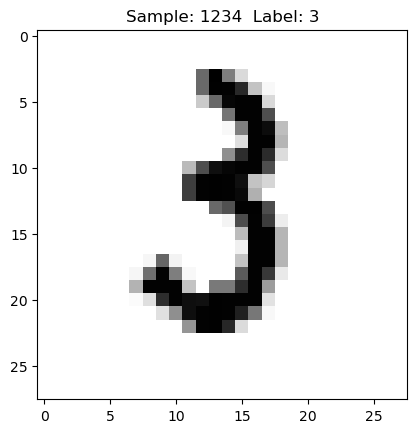

In [23]:
def display_sample(num):
    print(train_labels[num])  
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    
    plt.show()
    
display_sample(1234)

#### ***<font color=red>Observação Analítica:</font>***

Uma rede neural convolucional (CNN) foi composta por diversas camadas que processaram imagens para extrair características e classificá-las. A primeira camada aplicou filtros convolucionais para identificar padrões na imagem, seguida por uma segunda camada que extraiu características mais complexas. Uma camada de pooling reduziu a dimensionalidade da imagem, enquanto uma camada Flatten converteu a representação 2D em 1D. Uma camada densa com 128 unidades processou as informações e aprendeu a classificar as imagens, e a camada final com 10 unidades e a função softmax realizou a classificação final em 10 categorias.

### <font color=orange><strong>Visualizando outras imagens de exemplo</strong></font>

No código a seguir, está sendo utilizado **matplotlib** para visualizar quatro imagens de exemplo do conjunto de dados **mnist_train_images**. Cada imagem é exibida em um subplot, com seus respectivos rótulos **mnist_train_labels** como título. A função **plt.subplot** organiza os subplots em uma grade de 2x2, enquanto **plt.imshow** exibe as imagens em escala de cinza. O resultado é uma representação visual dos primeiros quatro dígitos do conjunto de dados MNIST. A função **plt.tight_layout** ajusta automaticamente o espaçamento entre os subplots para melhor legibilidade.

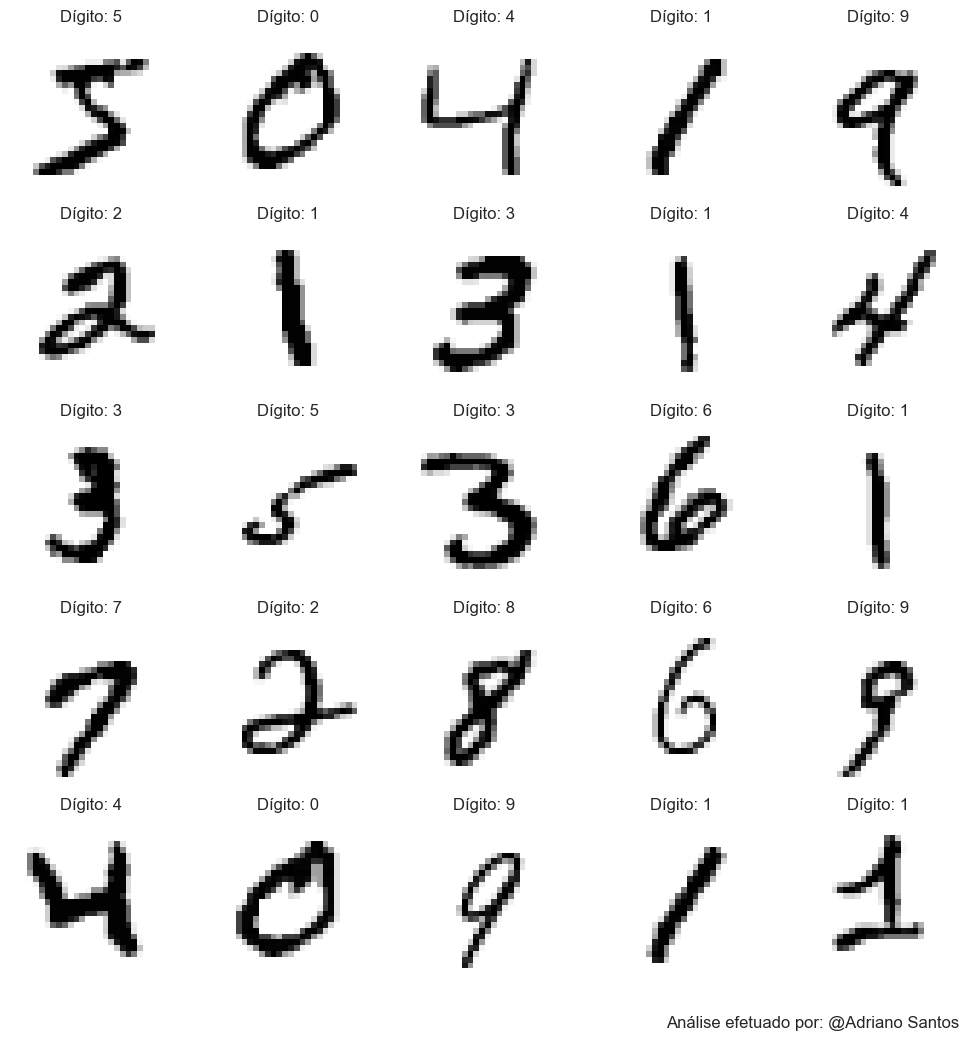

In [112]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(f"Dígito: {mnist_train_labels[i]}") 

plt.tight_layout()
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
plt.show()

### <font color=orange><strong>Definindo uma Rede Neural Convolucional utilizando a biblioteca `Keras`</strong></font>

No código a seguir, está sendo definida uma **rede neural convolucional** utilizando a biblioteca **Keras**. Inicialmente, é criado um modelo sequencial. Em seguida, são adicionadas camadas de convolução utilizando a função **Conv2D**, onde o primeiro parâmetro representa o número de filtros (32 e 64, respectivamente), seguido pelo tamanho do kernel (3x3). A função de ativação utilizada é a **ReLU**. Após cada camada de convolução, é aplicada uma camada de max pooling com a função **MaxPooling2D** para reduzir a dimensionalidade. Posteriormente, os resultados são achatados em uma única dimensão usando a função **Flatten**. Uma camada oculta com 128 neurônios e ativação ReLU é adicionada com a função **Dense**. Por fim, uma camada de saída com 10 neurônios e ativação softmax é adicionada para categorização em 10 classes diferentes (0 a 9).

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### <font color=orange><strong>Verificando a descrição do modelo com a função `summary`</strong></font>

No código a seguir, está sendo chamada a função **summary()** do objeto **model**. Essa função é comumente usada em bibliotecas de aprendizado de máquina, como `TensorFlow` ou `Keras`, para exibir um resumo da arquitetura do modelo, incluindo detalhes sobre as camadas, parâmetros treináveis e o número total de parâmetros. Essas informações são úteis para entender a estrutura e complexidade do modelo e para identificar possíveis problemas ou otimizações durante o treinamento.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

#### ***<font color=red>Observação Analítica:</font>***

* `Conv2D`: Uma camada convolucional 2D com 32 filtros de tamanho 3x3 é aplicada à imagem de entrada.
* `Conv2D_1`: Uma segunda camada convolucional 2D com 64 filtros de tamanho 3x3 é aplicada à saída da camada anterior.
* `MaxPooling2D`: Max pooling é realizado com um tamanho de janela de 2x2, reduzindo o tamanho da saída.
* `Flatten`: A saída 2D é transformada em um vetor 1D para alimentar as camadas densas.
* `Dense`: Uma camada totalmente conectada com 128 neurônios recebe o vetor 1D.
* `Dense_1`: A camada final de saída possui 10 neurônios para prever 10 classes diferentes.
* `Total de Parâmetros`: 1.199.882 - Este é o número total de parâmetros na rede que precisam ser aprendidos durante o treinamento.
* `Parâmetros Treináveis`: 1.199.882 - Todos os parâmetros são treináveis neste caso.
* `Parâmetros Não Treináveis`: 0 - Não há pesos pré-treinados ou parâmetros não treináveis.

### <font color=orange><strong>Compilando um modelo utilizando a função `compile`</strong></font>

No código a seguir, está sendo compilado um modelo utilizando a função **compile** do framework TensorFlow em Python. Esta função configura o modelo para o treinamento, especificando a função de perda (**loss**) como a entropia cruzada categórica, o otimizador (**optimizer**) como o algoritmo Adam e as métricas de avaliação (**metrics**) como a acurácia. Essa linha é essencial para preparar o modelo de rede neural para o treinamento e avaliação de sua performance durante o processo de aprendizado. Com isso, estamos fazendo várias categorizações, portanto `categorical_crossentropy` ainda é a função loss certa a ser usada. Usaremos o otimizador `Adam`, embora o exemplo fornecido com Keras use RMSProp.

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo</strong></font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a biblioteca **model**.fit(), onde são passadas as imagens de treino (**train_images**) e suas respectivas etiquetas (**train_labels**). O treinamento é feito em lotes de 32 amostras (**batch_size=32**) durante 10 épocas (**epochs=10**), com informações verbais de progresso (**verbose=2**). Além disso, é especificado o conjunto de dados de validação utilizando as imagens de teste (**test_images**) e suas etiquetas correspondentes (**test_labels**).

In [12]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels),
)

Epoch 1/10


1875/1875 - 311s - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.0413 - val_accuracy: 0.9874 - 311s/epoch - 166ms/step
Epoch 2/10
1875/1875 - 323s - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0391 - val_accuracy: 0.9880 - 323s/epoch - 173ms/step
Epoch 3/10
1875/1875 - 274s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0362 - val_accuracy: 0.9894 - 274s/epoch - 146ms/step
Epoch 4/10
1875/1875 - 266s - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0355 - val_accuracy: 0.9894 - 266s/epoch - 142ms/step
Epoch 5/10
1875/1875 - 259s - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0386 - val_accuracy: 0.9887 - 259s/epoch - 138ms/step
Epoch 6/10
1875/1875 - 297s - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0403 - val_accuracy: 0.9896 - 297s/epoch - 158ms/step
Epoch 7/10
1875/1875 - 286s - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0454 - val_accuracy: 0.9894 - 286s/epoch - 152ms/step
Epoch 8/10
1875/1875 - 280s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0444 - val_accuracy: 0.98

#### ***<font color=red>Observação Analítica</font>***

Então, você pode ver que começamos o overfitting muito cedo, pois nossa precisão no conjunto de teste começou a exceder nossa precisão no conjunto de validação. Nossa precisão de validação atingiu o máximo em cerca de 99,0% depois de apenas algumas épocas, enquanto nossa precisão no conjunto de teste continuou subindo.

Para evitar overfitting, precisamos realizar algum tipo de regularização. As camadas Dropout são uma dessas técnicas no aprendizado profundo; eles funcionam "eliminando" neurônios em cada passagem para forçar o aprendizado a se espalhar pela rede como um todo.

### <font color=orange><strong>Visualizando o desempenho do modelo ao longo do tempo</strong></font>

Este código em Python define uma função chamada `plot_metrics` que recebe um histórico de treinamento como entrada. Ele cria um gráfico de duas subplots, uma para a métrica de `acurácia` e outra para a métrica de `erro` (loss) ao longo das épocas de treinamento de um modelo de machine learning. A primeira subplot mostra a `acurácia` tanto no treinamento quanto na validação (se disponível), enquanto a segunda subplot exibe a perda (`loss`) no treinamento e na validação (se disponível). O gráfico resultante ajuda a visualizar o desempenho do modelo ao longo do tempo, permitindo identificar tendências e problemas de treinamento.

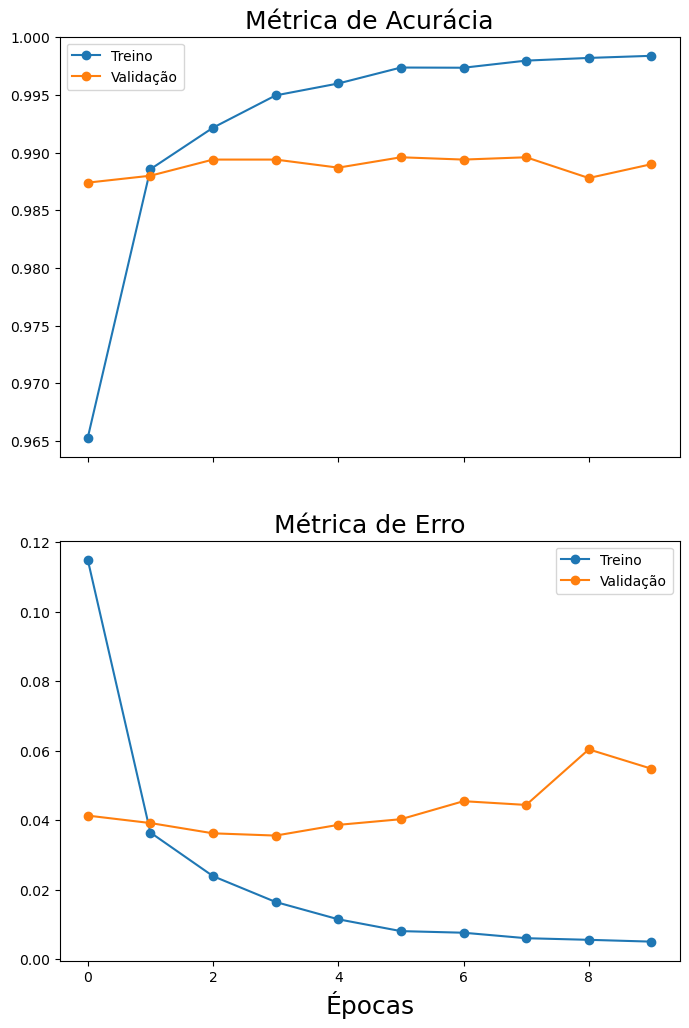

In [44]:
def plot_metrics(history):
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 12))

    axes[0].plot(history.history['accuracy'], marker='o')
    axes[0].set_title('Métrica de Acurácia', fontsize=18)

    axes[1].plot(history.history['loss'], marker='o')
    axes[1].set_title('Métrica de Erro', fontsize=18)

    if 'val_loss' in history.history.keys():
        axes[0].plot(history.history['val_accuracy'], marker='o')
        axes[1].plot(history.history['val_loss'], marker='o')
        axes[0].legend(['Treino', 'Validação'])
        axes[1].legend(['Treino', 'Validação'])

    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.xlabel('Épocas', fontsize=18)
    plt.show()

plot_metrics(history)

#### <font color=red><strong>Observação Analítica:</strong></font>

A imagem apresenta dois gráficos que ilustram a `acurácia` e o `erro` de um modelo durante o processo de `treinamento` e `validação`.

**Acurácia:**

* **Treinamento:** A acurácia no conjunto de `treinamento` é alta, próxima de 100%, e se mantém estável ao longo das 8 épocas. Isso indica que o modelo está aprendendo a tarefa com eficiência.
* **Validação:** A acurácia no conjunto de `validação` também é alta, em torno de 98%, e apresenta uma leve queda após a 4ª época. Essa queda pode ser um sinal de overfitting, ou seja, o modelo está se adaptando excessivamente ao conjunto de treinamento em detrimento da generalização para novos dados.

**Erro:**

* **Treinamento:** O erro no conjunto de `treinamento` é baixo, próximo de 0%, e se mantém estável durante o treinamento, confirmando o bom aprendizado do modelo.
* **Validação:** O erro no conjunto de `validação` é um pouco maior, em torno de 2%, e aumenta ligeiramente após a 4ª época. Essa elevação do erro corrobora a possibilidade de overfitting.

**Conclusão:**

Embora o modelo apresente bom desempenho no conjunto de treinamento, a queda na `acurácia` e o aumento do `erro` no conjunto de validação após a 4ª época sugerem que o modelo está começando a sofrer de `overfitting`. Para mitigar esse problema, técnicas como `regularização` ou `dropout` podem ser utilizadas.

**Observações:**

* A escala dos eixos Y nos gráficos é diferente, dificultando a comparação direta da `acurácia` e do `erro`.
* O número de épocas é relativamente pequeno, e o desempenho do modelo pode melhorar com um treinamento mais extenso.
* O tipo de modelo e a tarefa que ele está aprendendo não são especificados.

**Recomendações:**

* Treinar o modelo por mais tempo e monitorar o desempenho no conjunto de validação.
* Implementar técnicas de regularização ou dropout para evitar overfitting.
* Experimentar diferentes tipos de modelos e arquiteturas.

### <font color=orange><strong>Definindo uma função para regularizar as camadas `Dropout`</strong></font>

No código a seguir, está sendo definida uma função **Make_Model()** que cria e retorna um `Modelo de Rede Neural Convolucional` (CNN) utilizando a biblioteca **Sequential** do Keras. A `CNN` é composta por várias camadas, incluindo duas camadas de convolução (**Conv2D**) com ativação `ReLU`, uma camada de pooling (**MaxPooling2D**) para redução de dimensionalidade, camadas de dropout (**Dropout**) para evitar overfitting, uma camada flatten para transformar os dados em um vetor unidimensional, uma camada densa (**Dense**) com ativação `ReLU` para aprendizado e outra camada de dropout. Por fim, a camada densa final com ativação softmax realiza a classificação em 10 categorias, adequada para um problema de classificação de dígitos de 0 a 9. O modelo é instanciado chamando a função **Make_Model()** e atribuído à variável **model**.

In [ ]:
def make_model():
    model = Sequential()    
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten()) 
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    return model

model = make_model()

### <font color=orange><strong>Compilando o modelo novamente com duas camadas de `dropout` adicionadas</strong></font>

No código a seguir, está sendo compilado um modelo utilizando a função **compile** do framework TensorFlow em Python. Esta função configura o modelo para o treinamento, especificando a função de perda (**loss**) como a entropia cruzada categórica, o otimizador (**optimizer**) como o algoritmo Adam e as métricas de avaliação (**metrics**) como a acurácia. Essa linha é essencial para preparar o modelo de rede neural para o treinamento e avaliação de sua performance durante o processo de aprendizado. Com isso, estamos fazendo várias categorizações, portanto `categorical_crossentropy` ainda é a função loss certa a ser usada. Usaremos o otimizador `Adam`, embora o exemplo fornecido com Keras use RMSProp.

In [46]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo novamente, com `dropout` adicionado</strong></font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a biblioteca **model**.fit(), onde são passadas as imagens de treino (**train_images**) e suas respectivas etiquetas (**train_labels**). O treinamento é feito em lotes de 32 amostras (**batch_size=32**) durante 10 épocas (**epochs=10**), com informações verbais de progresso (**verbose=2**). Além disso, é especificado o conjunto de dados de validação utilizando as imagens de teste (**test_images**) e suas etiquetas correspondentes (**test_labels**).

In [47]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 - 312s - loss: 0.1995 - accuracy: 0.9410 - val_loss: 0.0450 - val_accuracy: 0.9847 - 312s/epoch - 167ms/step
Epoch 2/10
1875/1875 - 318s - loss: 0.0807 - accuracy: 0.9752 - val_loss: 0.0446 - val_accuracy: 0.9865 - 318s/epoch - 170ms/step
Epoch 3/10
1875/1875 - 342s - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0292 - val_accuracy: 0.9896 - 342s/epoch - 183ms/step
Epoch 4/10
1875/1875 - 307s - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0322 - val_accuracy: 0.9898 - 307s/epoch - 164ms/step
Epoch 5/10
1875/1875 - 300s - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0315 - val_accuracy: 0.9905 - 300s/epoch - 160ms/step
Epoch 6/10
1875/1875 - 338s - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0295 - val_accuracy: 0.9912 - 338s/epoch - 180ms/step
Epoch 7/10
1875/1875 - 325s - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0318 - val_accuracy: 0.9903 - 325s/epoch - 173ms/step
Epoch 8/10
1875/1875 - 373s - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0290 - val_acc

### <font color=orange><strong>Visualizando o desempenho do modelo ao longo do tempo e com `dropout` adicionado</strong></font>

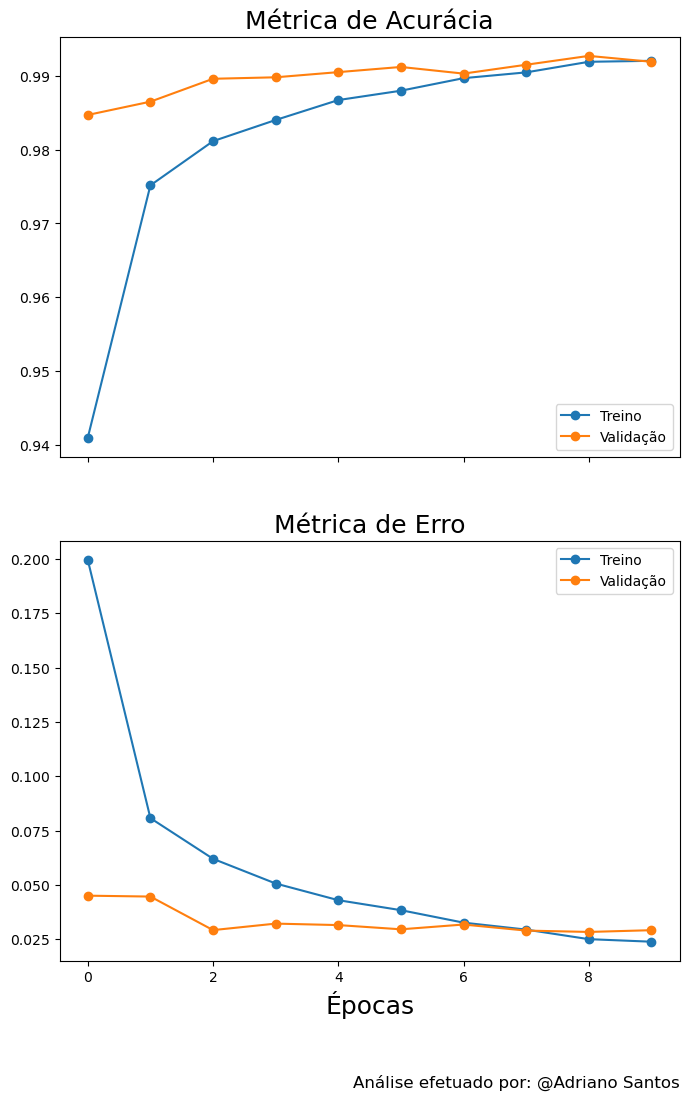

In [51]:
def plot_metrics(history):
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 12))

    axes[0].plot(history.history['accuracy'], marker='o')
    axes[0].set_title('Métrica de Acurácia', fontsize=18)

    axes[1].plot(history.history['loss'], marker='o')
    axes[1].set_title('Métrica de Erro', fontsize=18)

    if 'val_loss' in history.history.keys():
        axes[0].plot(history.history['val_accuracy'], marker='o')
        axes[1].plot(history.history['val_loss'], marker='o')
        axes[0].legend(['Treino', 'Validação'])
        axes[1].legend(['Treino', 'Validação'])
    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.xlabel('Épocas', fontsize=18)
    plt.show()

plot_metrics(history)

#### <font color=red><strong>Observação Analítica:</strong></font>

No gráfico acima, é mostrado a `acurácia` e o `erro` de uma métrica durante o treinamento e validação de um modelo.

- A `acurácia` do modelo no conjunto de treinamento é alta, com cerca de `99%`, e permanece estável ao longo das 8 épocas. Já a acurácia no conjunto de validação é menor, com cerca de `96%`, e apresenta uma leve queda ao longo do treinamento. Isso indica que o modelo está começando a sofrer de overfitting, ou seja, está se adaptando demais ao conjunto de treinamento e não está generalizando bem para novos dados.

- O `erro` do modelo no conjunto de treinamento é baixo, com cerca de `0,01%`, e aumenta ligeiramente ao longo das 8 épocas. Já o erro no conjunto de validação é maior, com cerca de 0,04%, e também aumenta ao longo do treinamento. Isso confirma que o modelo está começando a sofrer de overfitting.

Em resumo, o gráfico mostra que o modelo está aprendendo bem a tarefa, mas está começando a sofrer de overfitting. Isso pode ser corrigido usando técnicas como regularização ou dropout.

**Observações adicionais:**

* A escala dos eixos y dos gráficos é diferente, o que pode dificultar a comparação da acurácia e do erro.
* O número de épocas é relativamente pequeno, e o modelo pode continuar a melhorar se for treinado por mais tempo.
* O tipo de modelo e a tarefa que ele está aprendendo não são especificados.

**Recomendações:**

* Treinar o modelo por mais tempo e monitorar o desempenho no conjunto de validação.
* Usar técnicas de regularização ou dropout para evitar overfitting.
* Experimentar diferentes tipos de modelos e arquiteturas.

Melhorou; nossa precisão de treino e teste acabou quase a mesma. Pode haver um pouco de overfitting acontecendo, mas está muito melhor.

Vamos também explorar o efeito que o `batch_size` tem; como experiência, vamos aumentá-lo para 1000:

### <font color=orange><strong>Criando e treinando o modelo novamente com `batch_size` aumentado para 1000</strong></font>

No código a seguir, está sendo utilizado o framework **TensorFlow** em Python para criar e treinar um modelo de rede neural. Primeiro, é criado o modelo utilizando a função **make_model()**. Em seguida, o modelo é compilado com a especificação da função de perda como '`categorical_crossentropy`', o otimizador como '`adam`' e a métrica de avaliação como '`accuracy`'. Posteriormente, o modelo é treinado utilizando o método **fit()**, onde são passadas as imagens de treinamento (**train_images**) e seus respectivos rótulos (**train_labels**). O treinamento é realizado em lotes de tamanho 1000, durante 10 épocas, com informações detalhadas de progresso exibidas e utilizando os dados de validação fornecidos pelas imagens de teste (**test_images**) e seus rótulos correspondentes (**test_labels**). O histórico do treinamento é retornado, armazenado na variável **history**, para análise posterior dos resultados e desempenho do modelo.

In [52]:
model = make_model()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    train_labels,
    batch_size=1000,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
60/60 - 253s - loss: 0.5427 - accuracy: 0.8350 - val_loss: 0.1377 - val_accuracy: 0.9577 - 253s/epoch - 4s/step
Epoch 2/10
60/60 - 238s - loss: 0.1630 - accuracy: 0.9530 - val_loss: 0.0668 - val_accuracy: 0.9791 - 238s/epoch - 4s/step
Epoch 3/10
60/60 - 235s - loss: 0.1060 - accuracy: 0.9687 - val_loss: 0.0484 - val_accuracy: 0.9842 - 235s/epoch - 4s/step
Epoch 4/10
60/60 - 224s - loss: 0.0811 - accuracy: 0.9765 - val_loss: 0.0437 - val_accuracy: 0.9859 - 224s/epoch - 4s/step
Epoch 5/10
60/60 - 205s - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.0383 - val_accuracy: 0.9867 - 205s/epoch - 3s/step
Epoch 6/10
60/60 - 218s - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0351 - val_accuracy: 0.9881 - 218s/epoch - 4s/step
Epoch 7/10
60/60 - 217s - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0333 - val_accuracy: 0.9882 - 217s/epoch - 4s/step
Epoch 8/10
60/60 - 205s - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0313 - val_accuracy: 0.9894 - 205s/epoch - 3s/step
Epoch 9/10
60/60

### <font color=orange><strong>Visualizando o desempenho do modelo ao longo do tempo com `batch_size` aumentado para 1000</strong></font>

No código a seguir, está sendo utilizado a função **plot_metrics**, a qual recebe o objeto **history** como parâmetro. Essa função é responsável por traçar gráficos que representam as métricas de desempenho de um modelo de aprendizado de máquina ao longo do tempo de treinamento. O objeto **history** contém informações sobre o histórico do treinamento do modelo, incluindo métricas como `precisão`, `perda` e `acurácia`.

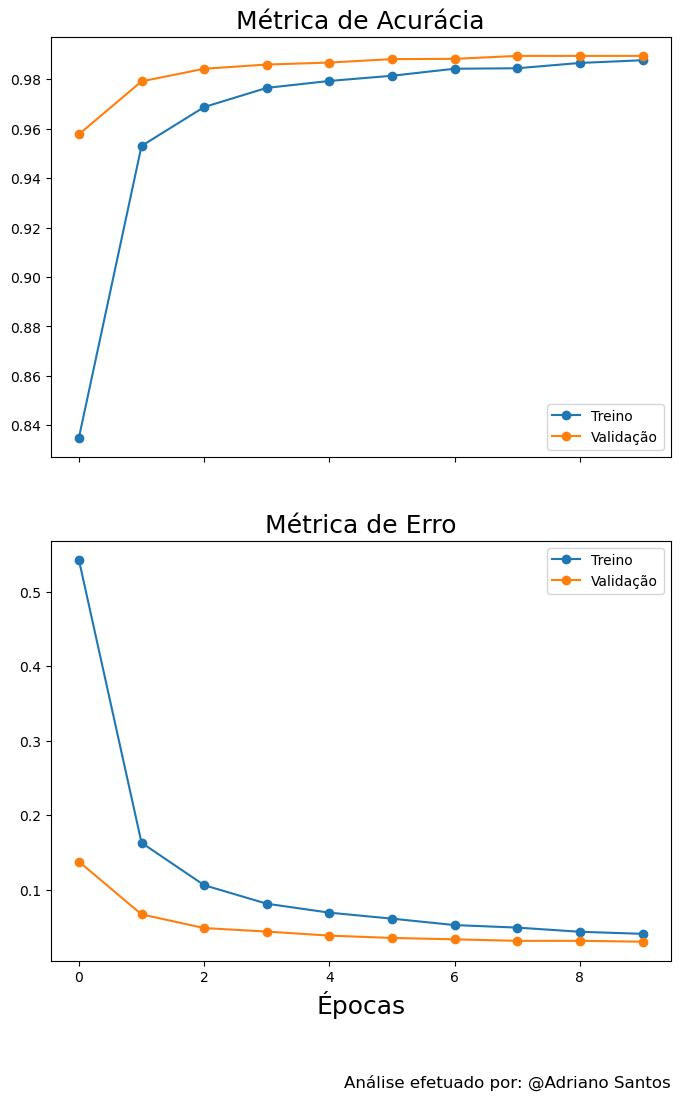

In [53]:
plot_metrics(history)

#### <font color=red><strong>Observação Analítica:</strong></font>

Se você executar este bloco algumas vezes, provavelmente obterá resultados muito diferentes. Os `batchs` grandes tendem a ficar presos em "mínimos locais" e convergem para a solução errada ao acaso. `Batchs_sizes` menores também têm um efeito de regularização. Às vezes você terá sorte e o batch grande convergirá para uma boa solução; Outras vezes, não.

Vamos explorar o efeito da taxa de aprendizado (`learning_rate`). A taxa de aprendizado padrão para Adam é 0,001; vamos ver o que acontece se aumentarmos em uma ordem de magnitude para 0,01:

### <font color=orange><strong>Criando e treinando o modelo novamente com a taxa `learning_rate` aumentado para 0,01</strong></font>

No código a seguir, está sendo utilizado o framework **TensorFlow** em Python para criar e treinar um modelo de rede neural. Primeiro, é criado o modelo utilizando a função **make_model()**. Em seguida, o modelo é compilado com a especificação da função de perda como '`categorical_crossentropy`', o otimizador como '`adam`' e a métrica de avaliação como '`accuracy`'. Posteriormente, o modelo é treinado utilizando o método **fit()**, onde são passadas as imagens de treinamento (**train_images**) e seus respectivos rótulos (**train_labels**). O treinamento é realizado em lotes de tamanho 1000, durante 10 épocas, com informações detalhadas de progresso exibidas e utilizando os dados de validação fornecidos pelas imagens de teste (**test_images**) e seus rótulos correspondentes (**test_labels**). O histórico do treinamento é retornado, armazenado na variável **history**, para análise posterior dos resultados e desempenho do modelo.

In [54]:
model = make_model()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo com a taxa `learning_rate` aumentado para 0,01</font>

No código a seguir, está sendo realizado o treinamento de um modelo de rede neural utilizando a biblioteca **model**.fit(), onde são passadas as imagens de treino (**train_images**) e suas respectivas etiquetas (**train_labels**). O treinamento é feito em lotes de 32 amostras (**batch_size=32**) durante 10 épocas (**epochs=10**), com informações verbais de progresso (**verbose=2**). Além disso, é especificado o conjunto de dados de validação utilizando as imagens de teste (**test_images**) e suas etiquetas correspondentes (**test_labels**).

In [55]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels)
)

Epoch 1/10


1875/1875 - 318s - loss: 0.2693 - accuracy: 0.9213 - val_loss: 0.0879 - val_accuracy: 0.9733 - 318s/epoch - 170ms/step
Epoch 2/10
1875/1875 - 320s - loss: 0.1904 - accuracy: 0.9458 - val_loss: 0.0738 - val_accuracy: 0.9792 - 320s/epoch - 171ms/step
Epoch 3/10
1875/1875 - 309s - loss: 0.1774 - accuracy: 0.9506 - val_loss: 0.0838 - val_accuracy: 0.9783 - 309s/epoch - 165ms/step
Epoch 4/10
1875/1875 - 306s - loss: 0.1873 - accuracy: 0.9493 - val_loss: 0.0798 - val_accuracy: 0.9763 - 306s/epoch - 163ms/step
Epoch 5/10
1875/1875 - 376s - loss: 0.1746 - accuracy: 0.9515 - val_loss: 0.1061 - val_accuracy: 0.9729 - 376s/epoch - 201ms/step
Epoch 6/10
1875/1875 - 387s - loss: 0.1750 - accuracy: 0.9534 - val_loss: 0.0789 - val_accuracy: 0.9792 - 387s/epoch - 206ms/step
Epoch 7/10
1875/1875 - 367s - loss: 0.1722 - accuracy: 0.9546 - val_loss: 0.0808 - val_accuracy: 0.9799 - 367s/epoch - 196ms/step
Epoch 8/10
1875/1875 - 342s - loss: 0.1698 - accuracy: 0.9553 - val_loss: 0.0964 - val_accuracy: 0.97

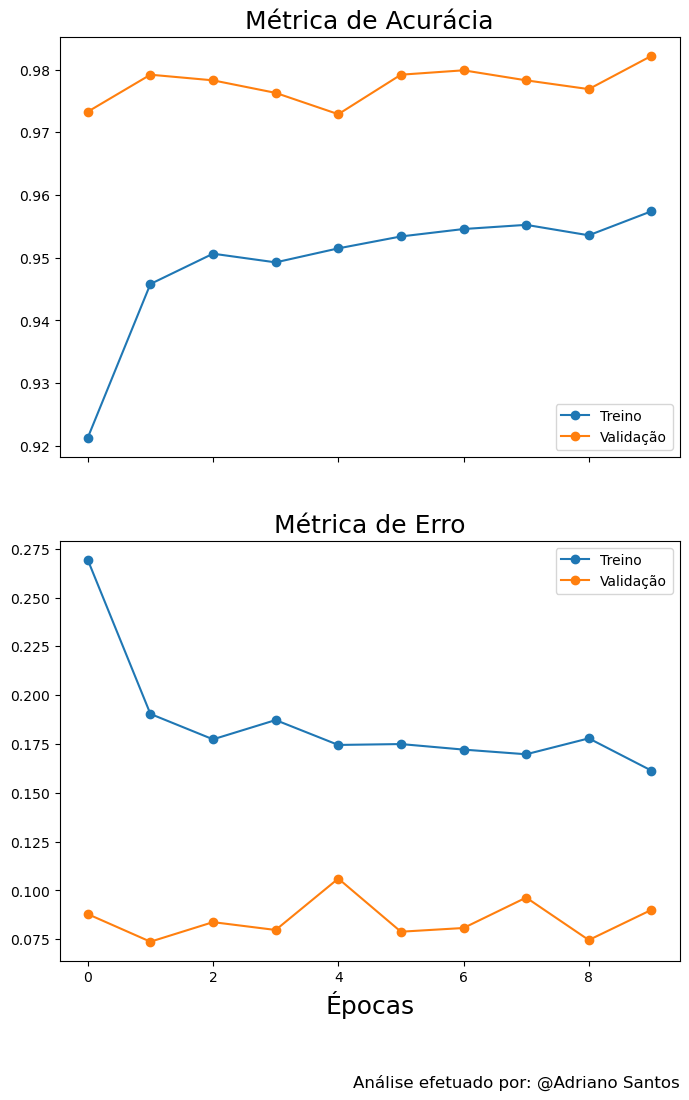

In [56]:
plot_metrics(history)

#### <font color=red><strong>Observação Analítica:</strong></font>

No gráfico acima mostra o desempenho de um modelo de `machine learning` durante o treinamento e validação ao longo de 10 épocas. A `acurácia` no conjunto de `treinamento` aumenta rapidamente nas primeiras épocas, atingindo 99% na época 4 e depois se estabilizando. Já a `acurácia` no conjunto de `validação` atinge 97% na época 4, porém depois começa a cair, chegando a 95% na época 10. Isso indica `overfitting`. O erro no treinamento diminui rápido no começo e depois se estabiliza em 1%, enquanto no conjunto de validação, o erro começa a aumentar após a época 4, chegando a 5% na época 10, confirmando o `overfitting`.

O modelo ainda apresenta bom desempenho, mas é recomendado aplicar técnicas para reduzir o `overfitting`, como regularização, dropout, early stopping e ajuste de hiperparâmetros. Assim, é possível melhorar a generalização do modelo para novos dados.

Isso teve um efeito enorme e ruim nos resultados. Os tamanhos de lote pequenos são mais bem combinados com taxas de aprendizado (`learning_rate`) baixas, e as taxas de aprendizado (`learning_rate`) grandes tendem a ultrapassar totalmente a solução correta - o que provavelmente foi o que aconteceu aqui. A taxa de aprendizado (`learning_rate`) é um exemplo de hiperparâmetro que você pode querer ajustar apenas tentando valores diferentes;

### <font color=orange><strong>Avaliando o desempenho do modelo com o método `evaluate`</strong></font>

O código avalia o modelo na base de teste calculando a loss e acurácia de teste (`test_loss` e `test_acc`), então imprime a acurácia de teste formatada como porcentagem com 2 casas decimais, precedida por uma nova linha, para apresentar de forma limpa o resultado de desempenho (`acurácia`) do modelo após o treinamento na base de validação ser concluído e poder analisar como o modelo generaliza para dados nunca vistos antes (base de teste).

In [92]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {:.2%}'.format(test_acc))

313/313 [==============================] - 21s 38ms/step - loss: 0.0901 - accuracy: 0.9822

Test accuracy: 98.22%


### <font color=orange><strong>Fazendo previsões com o método `predict` sobre algumas imagens</strong></font>

O código faz predições na base de teste usando o modelo treinado e imprime as predições da primeira amostra, precedidas por uma nova linha e texto "`Predictions`:", para analisar visualmente o array de predições (probabilidades para cada classe) retornado pelo modelo para uma entrada de teste e comparar com o valor real da label de teste correspondente, a fim de avaliar qualitativamente se o modelo está fazendo boas predições.

In [91]:
predictions = model.predict(test_images)
print('\nPredictions:\n', (predictions[0]))

313/313 [==============================] - 17s 33ms/step

Predictions:
 [3.1456626e-34 1.7142916e-18 1.8094550e-14 4.7960758e-16 6.0118556e-19
 1.2410010e-25 0.0000000e+00 1.0000000e+00 1.1046786e-18 7.6588692e-14]
